# Results

Compare between drugs.
* Which are frequently used
* What age range
* Did they stop and go to another drug

*Include in conclusion:
During the analysis it was found that the data was not very precise or consistent as some results were interpretted during updating the document and changing the survey codes. Usually during the analysis, such results are excluded. 

##### Finally,  cluster similar items and show the clustering result. Since you have high-dimensional data, use a dimension reduction technique to reduce the number of dimensions for 2D plotting. Perform clustering on two aggregation levels. First, cluster the aggregated data and let the user interactively select clustering algorithms and its parameter. The goal of this step is to select one cluster in which in a second interactive plot the items that are part of the aggregated cluster are presented and again clustered using an interactive visualization. To realize this, you create a simple overview+detail setup.

In [3]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [ ]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')


In [13]:
case_quest_data = dataset.ix[:,0:2].copy()
tabacco = dataset.ix[:,'CIGEVER':'PIPE30DY'].copy() # tabacco dataset
alcohol = dataset.ix[:,'ALCEVER':'DR5DAY'].copy() # alcohol dataset
cocaine = dataset.ix[:,'COCEVER':'CC30EST'].copy() # cocaine dataset
crack = dataset.ix[:,'CRKEVER':'CR30EST'].copy() # crack dataset
marijuana = dataset.ix[:,'MJEVER':'MR30EST'].copy() # marijuana dataset
heroin = dataset.ix[:,'HEREVER':'HR30EST'].copy() # heroin dataset
hallucinogens = dataset.ix[:,'LSD':'ECSREC'].copy() # hallucinogens dataset
inhalants = dataset.ix[:,'AMYLNIT':'IN30EST'].copy() # inhalants dataset
pain_relievers = dataset.ix[:,'DARVTYLC':'OXDAYPWK'].copy() # pain_relievers dataset
tranquilizers = dataset.ix[:,'KLONOPIN':'TRDAYPWK'].copy() # tranquilizers dataset
stimulants = dataset.ix[:,'METHDES':'MTDAYPWK'].copy() # stimulants dataset
sedatives = dataset.ix[:,'METHAQ':'SVDAYPWK'].copy() # sedatives dataset

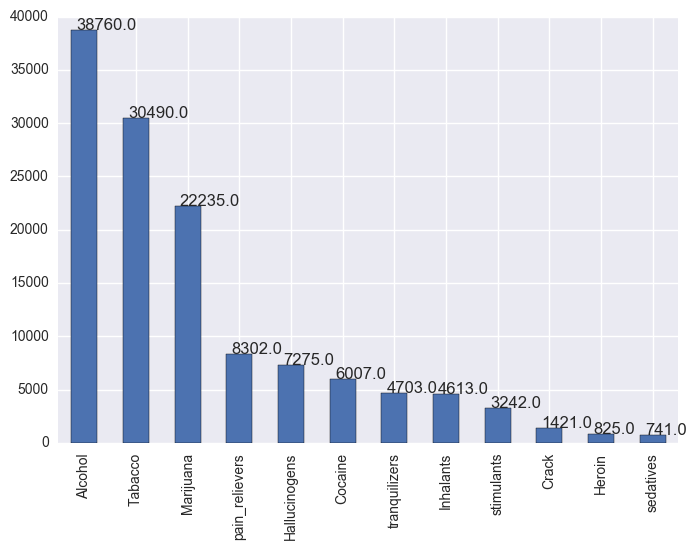

In [15]:
Num_Tabacco=tabacco.query('(CIGEVER==1)|(SNFEVER==1)|(CIGAREVR==1)').shape[0]
Num_Alcohol=alcohol.query('ALCEVER==1').shape[0]
Num_cocaine=cocaine.query('COCEVER==1').shape[0]
Num_crack=crack.query('CRKEVER==1').shape[0]
Num_marijuana=marijuana.query('MJEVER==1').shape[0]
Num_heroin=heroin.query('HEREVER==1').shape[0]
Num_Hallucinogens=hallucinogens.query('(LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1)').shape[0]
Num_Inhalants=inhalants.query('(AMYLNIT ==1)|(CLEFLU==1)|(GAS ==1)|(GLUE ==1)|(ETHER ==1)|(SOLVENT ==1)|(LGAS ==1)|(NITOXID ==1)|(SPPAINT ==1)|(AEROS ==1)|(INHNOLST==1)').shape[0]
Num_STI=stimulants.query('(METHDES ==1)|(DIETPILS ==1)|(RITMPHEN ==1)|(STMCARD ==1)').shape[0]
Num_SED=sedatives.query('(METHAQ ==1)|(NEMBBARB ==1)|(RESTTMAZ ==1)|(SEDCARD ==1)').shape[0]
Num_PR=pain_relievers.query('(ANLCARD ==1)|(VICOLOR ==1)|(PERCTYLX ==1)|(DARVTYLC ==1)').shape[0]
Num_tranquilizers=tranquilizers.query('(KLONOPIN ==1)|(XNAXATVN ==1)|(VALMDIAZ ==1)|(TRNCARD ==1)').shape[0]

Num__AllDrugs ={"Num":{"Tabacco":Num_Tabacco,"Alcohol":Num_Alcohol,"Cocaine":Num_cocaine,"Crack":Num_crack,"Marijuana":Num_marijuana,"Heroin":Num_heroin,"Hallucinogens":Num_Hallucinogens,"Inhalants":Num_Inhalants,"stimulants":Num_STI,"sedatives":Num_SED,"pain_relievers":Num_PR,"tranquilizers":Num_tranquilizers}}
DF_Num__AllDrugs=pd.DataFrame(Num__AllDrugs).sort_values('Num', ascending = False)

ax= DF_Num__AllDrugs['Num'].plot.bar()
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from IPython.html.widgets import interact, interact_manual
from IPython.html import widgets
from IPython.display import display

C:\Users\靜儀\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:

#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')
dataset_All = dataset.ix[:, ['CASEID', 'QUESTID2', 'ALCEVER', 'ALCDAYS', 'ALCTRY', 'MJEVER', 'MJDAY30A', 'MJAGE', 'CIGEVER', 'CIG30USE', 'CIGTRY', 'SNFEVER', 'SNF30USE', 'SNUFTRY', 'CIGAREVR', 'CGR30USE', 'CIGARTRY']].copy()
dataset_All['ALCTRY'] = dataset_All.ix[dataset_All['ALCTRY']<90, 'ALCTRY']
dataset_All['MJAGE'] = dataset_All.ix[dataset_All['MJAGE']<90, 'MJAGE']
dataset_All['CIGTRY'] = dataset_All.ix[dataset_All['CIGTRY']<90, 'CIGTRY']
dataset_All['SNUFTRY'] = dataset_All.ix[dataset_All['SNUFTRY']<90, 'SNUFTRY']
dataset_All['CIGARTRY'] = dataset_All.ix[dataset_All['CIGARTRY']<90, 'CIGARTRY']
dataset_All = dataset_All.fillna(0)

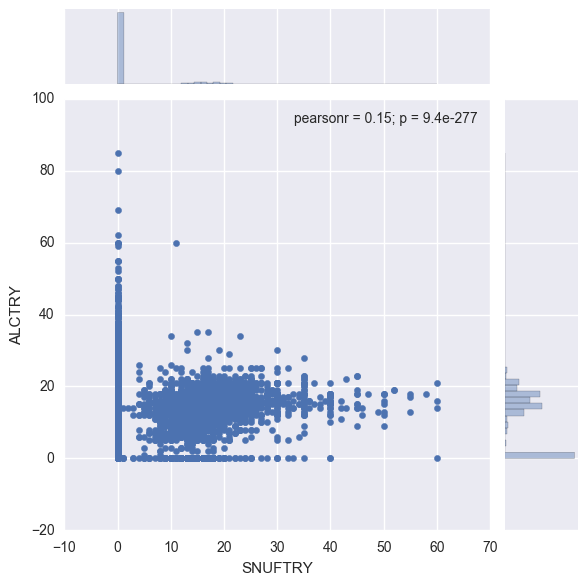

In [3]:
@interact(Drug1=['Alcohol', 'Tabacco Cigarettes', 'Tabacco Snuff', 'Tabacco Cigar','Marijuana'],Drug2=['Alcohol','Tabacco Cigarettes', 'Tabacco Snuff', 'Tabacco Cigar','Marijuana'])
def show_distplot(Drug1,Drug2):
    if Drug1 == 'Alcohol':
        x = 'ALCTRY'
    else:
        if Drug1 == 'Tabacco Cigarettes':
            x = 'CIGTRY'
        else:
            if Drug1 == 'Tabacco Snuff':
                x = 'SNUFTRY'
            else:
                if Drug1 == 'Tabacco Cigar':
                    x = 'CIGARTRY'
                else:
                    if Drug1 == 'Marijuana':
                        x = 'MJAGE'
                
    if Drug2 == 'Alcohol':
        y = 'ALCTRY'
    else:
        if Drug2 == 'Tabacco Cigarettes':
            y = 'CIGTRY'
        else:
            if Drug2 == 'Tabacco Snuff':
                y = 'SNUFTRY'
            else:
                if Drug2 == 'Tabacco Cigar':
                    y = 'CIGARTRY'
                else:
                    if Drug2 == 'Marijuana':
                        y = 'MJAGE'
                
    sns.jointplot(x=dataset_All[x],y=dataset_All[y])